# 1장-2절. 교차분석(적합성, 독립성, 동질성 검정)
- 교차분석이란?
    - 범주형 자료(명목/서열 수준)인 두 변수 간의 관계를 알아보기 위해 실시하는 분석 기법
    - 적합성 검정, 독립성 검정, 동질성 검정에 사용되며, 카이제곱 검정 통계량을 사용한다.
- 카이제곱 종류
    - 일원 카이제곱 검정 : 하나의 범주를 대상으로 한다. => 적합성 검정
    - 이원 카이제곱 검정 : 두개 이상의 범주를 대상으로 한다. => 독립성, 동일성 검정

---
---

## 01. 적합성 검정
- 실제 표본이 내가 생각하는 분포와 다른가?
- 관찰된 빈도가 기대빈도와 의미있게 다른지 여부를 검증하기 위해 사용되는 검증방법
- 자료가 빈도로 주어졌을 때, 특히 명목척도의 자료 분석에 이용된다.
- 즉, 모집단 분포에 대한 가정이 옳게 되었는지를 관측 자료와 비교하여 검증하는 것이다.
- 가설
    - 귀무가설 : 관측치와 기대치는 차이 없다.
    - 대립가설 : 관측치와 기대치는 차이 있다.

In [2]:
# 데이터 입력

import pandas as pd
# xo-> 관찰, xe->기대
xo, xe = [324,78,261],[371,80,212]
xc = pd.DataFrame([xo,xe], columns=['Item A','Item B','Item C'], index=['Obs','Exp'])
xc

,Item A,Item B,Item C
Obs,324,78,261
Exp,371,80,212


<function matplotlib.pyplot.show(close=None, block=None)>

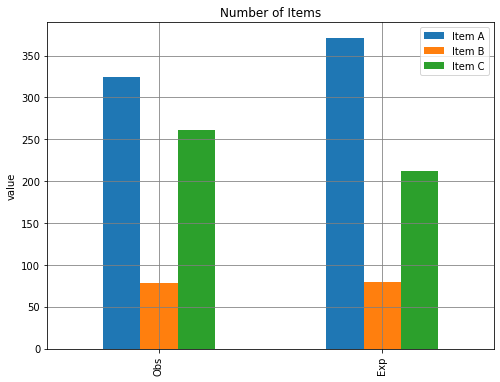

In [3]:
# 시각화해서 살펴보기

import matplotlib.pyplot as plt
%matplotlib inline

ax = xc.plot(kind='bar', title='Number of Items', figsize=(8,6))
ax.set_ylabel('value')
plt.grid(color='gray')
plt.show

=> 데이터에 조금 차이가 있는 것 가시적으로 확인할 수 있다.

In [4]:
# 적합성 검정(chisqure)

from scipy.stats import chisquare

result = chisquare(xo, f_exp=xe)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

=> p-value가 0.05보다 작으므로 귀무가설을 기각한다. 

즉, 관측치가 기대값과 차이가 있다.

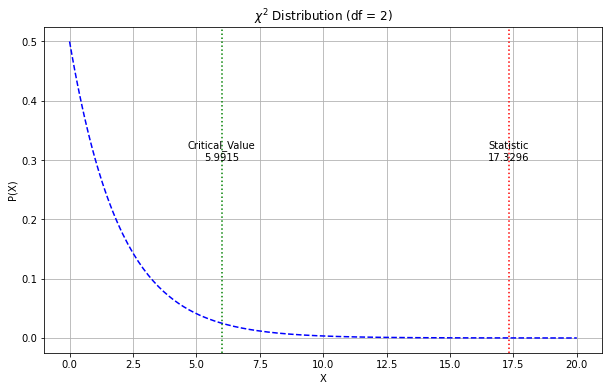

In [26]:
# 그래프 그려보기

import matplotlib.pyplot as plt
%matplotlib inline
from numpy import linspace
from scipy.stats import chi2

df = 2          # 자유도
x = linspace(0, 20, 201)
y = chi2(df).pdf(x)
x095 = chi2(df).ppf(.95)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b--')
plt.axvline(x=x095, color='green', linestyle=':')
plt.text(x095, .3, 'Critical_Value\n' + str(round(x095, 4)), 
         horizontalalignment='center', color='black')

plt.axvline(x=result[0], color='r', linestyle=':')
plt.text(result[0], .3, 'Statistic\n' + str(round(result[0], 4)), 
         horizontalalignment='center', color='black')

plt.xlabel('X')
plt.ylabel('P(X)')
plt.grid()
plt.title(r'$\chi^2$ Distribution (df = 2)')
plt.show()
plt.show()

---
---

## 02. 독립성 검정
- 모집단이 두 개의 변수 A,B에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지 아닌지를 검정하는 것을 의미한다.
    - 예) 회사에서 나이와 직위의 연관성
- 검정 통계량 값을 계산할 때는 교차표를 활용한다.
- 가설
    - 귀무가설 : 두 변수 사이는 연관 없다.(독립이다)
    - 대립가설 : 두 변수 사이는 연관 있다.(종속이다)

In [6]:
# 데이터 입력

import pandas as pd
# xo-> 관찰, xe->기대
xo, xe = [324,78,261],[371,80,212]
xc = pd.DataFrame([xo,xe], columns=['Item A','Item B','Item C'], index=['Obs','Exp'])
xc

,Item A,Item B,Item C
Obs,324,78,261
Exp,371,80,212


In [19]:
# 독립성 검정(chi2_contingency)

from scipy.stats import chi2_contingency

chi2_contingency([xo,xe])

(8.279843658458306,
 0.01592409625473879,
 2,
 array([[347.5,  79. , 236.5],
        [347.5,  79. , 236.5]]))

In [14]:
# chi_2 = 검정통계량, pval = p-value, dof = 자유도, expected = 기대빈도

chi_2, pval, dof, expected = chi2_contingency([xo,xe])
pval

0.01592409625473879

=> p-value가 0.05보다 작으므로 귀무가설을 기각한다. 

즉, 두 변수 사이에는 연관이 있다고 해석할 수 있다.

### @ 아래 동질성 검정과 같이 crosstab 이용해서 비교해도 된다.

---
---

## 03. 동질성 검정
- 모집단이 임의의 변수에 따라 R개의 속성으로 범주화되었을 때, R개의 부분 모집단에서 추출한 각 표본인 C개의 범주화된 집단의 분포가 서로 동일한지를 검정하는 것을 의미한다.
- 즉, 모집단이 다른 표본들이 동질적이냐 이질적이냐를 살펴보는 것
- 검정 통계량 값을 계산할 때는 교차표를 활용하며, 계산법과 검증법은 모두 독립성 검정과 같은 방법으로 진행된다.
- 가설
    - 귀무가설 : 분포가 서로 동일하다.
    - 대립가설 : 분포의 값중 다른 값이 하나 이상 존재한다.

In [16]:
# 데이터 불러오기

import pandas as pd 
data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/survey_method.csv") 
data

,no,method,survey
0,1,1,1
1,2,2,2
2,3,3,3
3,4,1,4
4,5,2,5
...,...,...,...
145,146,2,3
146,147,3,4
147,148,1,3
148,149,2,2


In [17]:
# crosstab 만들기

ctab = pd.crosstab(index=data["method"], columns=data["survey"]) 
print(ctab)

survey  1   2   3   4  5
method                  
1       5   8  15  16  6
2       8  14  11  11  6
3       8   7  11  15  9


In [21]:
# 동질성 검정(chi2_contigency)

from scipy.stats import chi2_contingency
chi2_contingency(ctab)

(6.544667820529891,
 0.5864574374550608,
 8,
 array([[ 7.        ,  9.66666667, 12.33333333, 14.        ,  7.        ],
        [ 7.        ,  9.66666667, 12.33333333, 14.        ,  7.        ],
        [ 7.        ,  9.66666667, 12.33333333, 14.        ,  7.        ]]))

In [23]:
# chi2 = 검정통계량, p = p-value, dof = 자유도, expected = 기대빈도

chi2, pval, dof, expected = chi2_contingency(ctab)
msg = "chi2:{}, p-value:{}, df:{}"
print(msg.format(chi2, pval, dof))

chi2:6.544667820529891, p-value:0.5864574374550608, df:8


=> p-value가 0.05보다 크므로 귀무가설을 기각하지 못한다. 

즉, 교육방법에 따른 교육생들의 만족도가 동질성이 있다.(차이가 없다.)

### @ 독립성과 동질성 검정의 차이는 표본추출 방법(관점)의 차이이다.

- 예시 
    - 만약 '성별'과 '흡연여부'를 두개의 변수로 보고 독립성 검정을 하겠다고 결정한다면, 표본추출은 전체집단 하나만 추출한다.

    - 만약, '흡연 여부'만은 변수로 보고 남/녀 그룹의 동질성을 비교하고 싶다면, 남자그룹과 여자그룹의 표본을 각각 추출한다.